In [46]:
!conda upgrade albumentation


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /home/korei/anaconda3
  package name: albumentation




In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import PIL.Image
import seaborn as sns
from albumentations import Compose, ShiftScaleRotate, Cutout, IAAAdditiveGaussianNoise, OpticalDistortion, GridDistortion, ElasticTransform

In [2]:
images = np.load("../input/train_128x128_crop.npy")
val = pd.read_csv("../input/val_index.csv")
cm = pd.read_csv("../input/class_map.csv")
preds = np.load("../result/baseline_2020_02_20_14_35_56/val_preds_0.npy")

In [3]:
val[["pred_gr", "pred_vd", "pred_cd"]] = pd.DataFrame(preds)

In [4]:
val["ind"] = val.image_id.apply(lambda x: int(x.split("_")[1]))

In [6]:
def crop_char_image(image, threshold=25):
    assert image.ndim == 2
    is_black = image < threshold

    is_black_vertical = np.sum(is_black, axis=0) > 0
    is_black_horizontal = np.sum(is_black, axis=1) > 0
    left = np.argmax(is_black_horizontal)
    right = np.argmax(is_black_horizontal[::-1])
    top = np.argmax(is_black_vertical)
    bottom = np.argmax(is_black_vertical[::-1])
    print(left, right, top, bottom)
    height, width = image.shape
    cropped_image = image[left-20:height - right+20, top-20:width - bottom+20]
    return cropped_image

In [5]:
aug = Compose([
    ShiftScaleRotate(rotate_limit=15, p=1),
#     IAAAdditiveGaussianNoise(p=1),
#     OpticalDistortion(p=1),
#     GridDistortion(p=1),
#     ElasticTransform(p=1),    
    Cutout(max_h_size=12, max_w_size=12, p=1)
])

In [6]:
cm.component_type.unique()

array(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
      dtype=object)

In [7]:
cm_gr = cm[cm.component_type == "grapheme_root"]
cm_vd = cm[cm.component_type == "vowel_diacritic"].reset_index()
cm_cd = cm[cm.component_type == "consonant_diacritic"].reset_index()

In [8]:
val["gr_letter"] = val.grapheme_root.map(cm_gr.component)
val["cd_letter"] = val.consonant_diacritic.map(cm_cd.component)
val["vd_letter"] = val.vowel_diacritic.map(cm_vd.component)
val["gr_pred_letter"] = val.pred_gr.map(cm_gr.component)
val["cd_pred_letter"] = val.pred_cd.map(cm_cd.component)
val["vd_pred_letter"] = val.pred_vd.map(cm_vd.component)

In [9]:
val

,Unnamed: 0,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,pred_gr,pred_vd,pred_cd,ind,gr_letter,cd_letter,vd_letter,gr_pred_letter,cd_pred_letter,vd_pred_letter
0,0,Train_8,67,0,0,ত্থ,67,0,0,8,ত্থ,0,0,ত্থ,0,0
1,1,Train_29,160,0,0,হ্ন,160,0,0,29,হ্ন,0,0,হ্ন,0,0
2,2,Train_32,103,1,5,ফ্রা,103,1,5,32,ফ,্র,া,ফ,্র,া
3,3,Train_41,23,4,0,গু,23,4,0,41,গ,0,ু,গ,0,ু
4,4,Train_52,43,1,4,জ্যা,43,1,4,52,জ,্য,া,জ,্য,া
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40163,40163,Train_200829,81,4,0,নু,81,4,0,200829,ন,0,ু,ন,0,ু
40164,40164,Train_200830,39,2,0,চ্চি,39,2,0,200830,চ্চ,0,ি,চ্চ,0,ি
40165,40165,Train_200831,81,9,2,র্নো,81,9,2,200831,ন,র্,ো,ন,র্,ো
40166,40166,Train_200836,65,9,0,ত্তো,65,9,0,200836,ত্ত,0,ো,ত্ত,0,ো


In [10]:
miss_gr = val[val.grapheme_root != val.pred_gr]

45 Unnamed: 0                    4335
image_id               Train_21469
grapheme_root                   85
vowel_diacritic                  2
consonant_diacritic              0
grapheme                      ন্ডি
pred_gr                         56
pred_vd                          2
pred_cd                          0
ind                          21469
gr_letter                      ন্ড
cd_letter                        0
vd_letter                        ি
gr_pred_letter                   ড
cd_pred_letter                   0
vd_pred_letter                   ি
Name: 4335, dtype: object


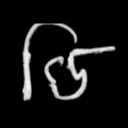

In [12]:
r = random.randint(0, len(miss_gr)-1)
print(r, miss_gr.iloc[r])
PIL.Image.fromarray(images[miss_gr.iloc[r].ind])

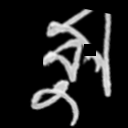

In [70]:
PIL.Image.fromarray(aug(image=images[miss_gr.iloc[r].ind])["image"])

In [98]:
v = Cutout(p=1)(image=images[:10])["image"]

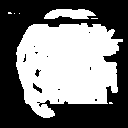

In [99]:
PIL.Image.fromarray(v.mean(0).astype(np.uint8) > 0)

In [94]:
v.sum(0).shape

(128, 128)